<a href="https://colab.research.google.com/github/Likhithagandham/Student-Training-Program/blob/main/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Forecasting with Regression and MLP

This project explores **time-series forecasting** of temperature data using different regression models.  
It demonstrates how traditional regression methods and neural networks can be applied to weather data.

---

## Features
- Preprocessing:
  - Date parsing and feature extraction (`Day`, `Month`, `DayOfWeek`)
  - Time-series features (`Lagged_Temperature`, `30-day Moving Average`)
- Models:
  - **Linear Regression**
  - **Polynomial Regression (Day feature, degree=4)**
  - **MLP Regressor** (multi-layer perceptron)
- Evaluation using **Mean Squared Error (MSE)**
- Visualization of actual vs predicted values for model comparison

---

## Dataset
The project uses a sample dataset: **`weather_dataset.csv`**  
- Columns: `Date`, `Temperature`  
- 365 daily entries (synthetic data with seasonal patterns)

You can also replace it with real datasets (e.g., Kaggle or IMD weather data).

---

## Results
- Linear Regression provides a simple baseline.  
- Polynomial Regression captures seasonal patterns but can overfit.  
- MLP learns non-linear relationships and often achieves lower error.  
- Comparison plot shows actual vs predicted values from all models.

---

## How to Run
1. Clone this repository:
   ```bash
   git clone https://github.com/your-username/weather-forecasting.git
   cd weather-forecasting


MSE Scores:
Linear Regression: 26.470870906425883
Polynomial Regression: 29.829149338861104
MLP Regressor: 162.14650279489962


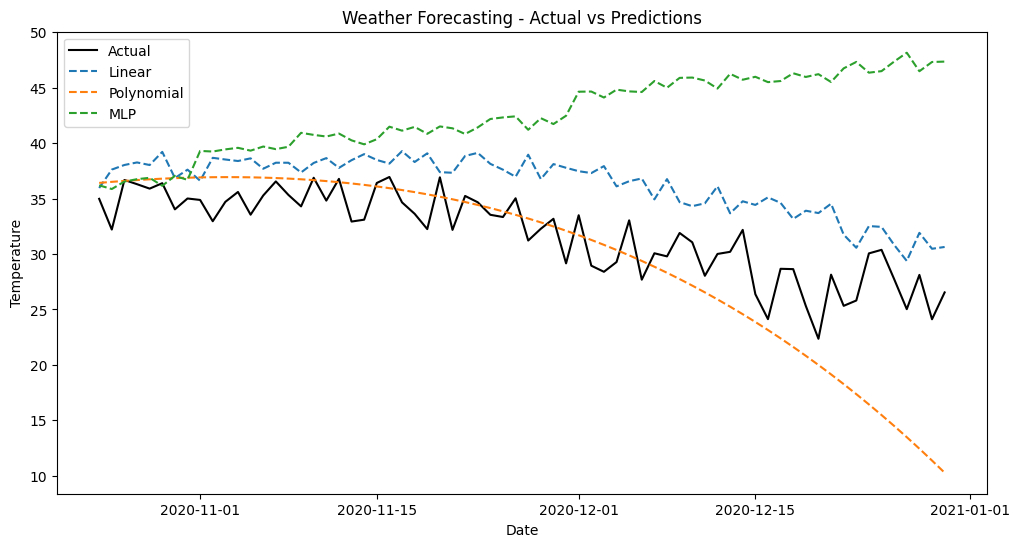

In [ ]:
# Weather Forecasting with Regression + MLP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# -------------------------
# Load & Preprocess Dataset
# -------------------------
df = pd.read_csv("weather_dataset.csv")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'Temperature'])

df['Day'] = (df['Date'] - df['Date'].min()).dt.days
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Lagged_Temperature'] = df['Temperature'].shift(7)
df['Moving_Average'] = df['Temperature'].rolling(window=30).mean()
df = df.dropna().reset_index(drop=True)

# -------------------------
# Train/Test Split
# -------------------------
X = df[['Day', 'Month', 'DayOfWeek', 'Lagged_Temperature', 'Moving_Average']]
y = df['Temperature']
split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# -------------------------
# Linear Regression
# -------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# -------------------------
# Polynomial Regression (Day feature only)
# -------------------------
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train[['Day']])
X_test_poly = poly.transform(X_test[['Day']])

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# -------------------------
# MLP Regressor
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

# -------------------------
# Evaluation
# -------------------------
print("MSE Scores:")
print("Linear Regression:", mean_squared_error(y_test, y_pred_lin))
print("Polynomial Regression:", mean_squared_error(y_test, y_pred_poly))
print("MLP Regressor:", mean_squared_error(y_test, y_pred_mlp))

# -------------------------
# Visualization
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(df['Date'].iloc[split_index:], y_test, label="Actual", color="black")
plt.plot(df['Date'].iloc[split_index:], y_pred_lin, label="Linear", linestyle="--")
plt.plot(df['Date'].iloc[split_index:], y_pred_poly, label="Polynomial", linestyle="--")
plt.plot(df['Date'].iloc[split_index:], y_pred_mlp, label="MLP", linestyle="--")
plt.legend()
plt.title("Weather Forecasting - Actual vs Predictions")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()
